In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

## Read data

#### Movies

In [2]:
genres= ['unknown','action','adventure','animation','childrens','comedy','crime','documentary','drama','fantasy','noir','horror','musical','mystery','romance','scifi','thriller','war','western']

In [3]:
def onehotencoding2genre(x):
    ret_val = []
    for c in genres:
        g = getattr(x, c)
        if g == 1:
            ret_val.append(c)
    return ret_val

In [4]:
df_movies = pd.read_csv("data/movies_cast_company.csv", encoding='utf8')
df_movies["cast"] = df_movies["cast"].apply(lambda x: json.loads(x))
df_movies["company"] = df_movies["company"].apply(lambda x: json.loads(x))
df_movies["genres"] = df_movies.apply(lambda x: onehotencoding2genre(x), axis=1)
print(df_movies.shape)
df_movies.head()

(1315, 29)


,Unnamed: 0,movie_id_ml,title,release,url,unknown,action,adventure,animation,childrens,...,romance,scifi,thriller,war,western,movie_id,keyword,cast,company,genres
0,0,1,toy story,1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,2445635,"['walkie-talkie', 'boy', 'slow-motion', 'villa...","[{'cast_id': 193929, 'person_id': 30260, 'cast...","[{'company_id': 34, 'name': 'Warner Home Video...","[animation, childrens, comedy]"
1,1,2,goldeneye,1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,1,0,0,1923289,"['car-chase', 'good-versus-evil', '1990s', 'bl...","[{'cast_id': 586283, 'person_id': 83451, 'cast...","[{'company_id': 19, 'name': 'National Broadcas...","[action, adventure, thriller]"
2,2,3,four rooms,1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,1,0,0,1900170,"['number-in-title', 'title-directed-by-female'...","[{'cast_id': 629008, 'person_id': 89615, 'cast...","[{'company_id': 11745, 'name': 'Laurenfilm', '...",[thriller]
3,3,4,get shorty,1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,1915485,"['actress', 'father-daughter-relationship', 'r...","[{'cast_id': 1341029, 'person_id': 184099, 'ca...","[{'company_id': 19, 'name': 'National Broadcas...","[action, comedy, drama]"
4,4,5,copycat,1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,1,0,0,1788620,"['mother-son-relationship', 'san-francisco-cal...","[{'cast_id': 643068, 'person_id': 91412, 'cast...","[{'company_id': 34, 'name': 'Warner Home Video...","[crime, drama, thriller]"


#### Ratings

In [5]:
df_ratings = pd.read_csv("data/ratings.csv")
print(df_ratings.shape)
df_ratings.head()

(100000, 4)


,user_id,movie_id_ml,rating,rating_timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


#### Users

In [6]:
df_users = pd.read_csv("data/users.csv")
print(df_users.shape)
df_users.head()

(943, 5)


,user_id,user_age,user_gender,user_occupation,user_zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Merge

In [7]:
df = pd.merge(df_movies, df_ratings, on="movie_id_ml")
df = pd.merge(df, df_users, on="user_id")
print(df.shape)
df.head()

(90851, 36)


,Unnamed: 0,movie_id_ml,title,release,url,unknown,action,adventure,animation,childrens,...,cast,company,genres,user_id,rating,rating_timestamp,user_age,user_gender,user_occupation,user_zipcode
0,0,1,toy story,1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,"[{'cast_id': 193929, 'person_id': 30260, 'cast...","[{'company_id': 34, 'name': 'Warner Home Video...","[animation, childrens, comedy]",308,4,1998-02-17 17:28:52,60,M,retired,95076
1,3,4,get shorty,1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,"[{'cast_id': 1341029, 'person_id': 184099, 'ca...","[{'company_id': 19, 'name': 'National Broadcas...","[action, comedy, drama]",308,5,1998-02-17 17:51:30,60,M,retired,95076
2,4,5,copycat,1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,"[{'cast_id': 643068, 'person_id': 91412, 'cast...","[{'company_id': 34, 'name': 'Warner Home Video...","[crime, drama, thriller]",308,4,1998-02-17 18:20:08,60,M,retired,95076
3,5,7,twelve monkeys,1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,"[{'cast_id': 30433, 'person_id': 5426, 'cast_n...","[{'company_id': 160, 'name': 'American Broadca...","[drama, scifi]",308,4,1998-02-17 18:07:27,60,M,retired,95076
4,6,8,babe,1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,"[{'cast_id': 555738, 'person_id': 79746, 'cast...","[{'company_id': 160, 'name': 'American Broadca...","[childrens, comedy, drama]",308,5,1998-02-17 17:31:36,60,M,retired,95076


---

# Trending Now!

This type of recommender provides a general chart of recommended movies to **all users**. This is not sensitive to the interests and tastes of a particular user. We will use this as a general recommendation **before** user fills in the data required to predict the movies he/she likes - a.k.a. **Trending Now!**

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 3.9 average rating and only 2 votes cannot be considered better than the movie with 2.8 as as average rating but 100 votes.

We will be using the IMDb's weighted rating given as:

$$ w = \frac{v}{v+m}\cdot R + \frac{m}{v+m} \cdot C$$

where:
- $w$ is the weighted average of the movie;
- $v$ is the number of votes for the movie;
- $m$ is the min votes required to be listed in this chart (we can calculate);
- $R$ is the average rating of the movie;
- $C$ is the mean vote accross the whole dataset (we can calculate).

First, lets count total number of ratings for each movie and its average rating.

In [8]:
df_movie_count_mean = df.groupby(["movie_id_ml", "title"], as_index=False)["rating"].agg(["count", "mean"]).reset_index()
df_movie_count_mean.head()

,movie_id_ml,title,count,mean
0,1,toy story,452,3.878319
1,2,goldeneye,131,3.206107
2,3,four rooms,90,3.033333
3,4,get shorty,209,3.550239
4,5,copycat,86,3.302326


In [9]:
C = df_movie_count_mean["mean"].mean()
C

3.097627199977294

Here we can see that average rating of all the movies is **3.1/5.0**.

In [10]:
m = df_movie_count_mean["count"].quantile(0.9)
m

187.10000000000014

For a movie to feature in these recommendation charts, im must have more than at least of **90%** of the votes of movies in the list. Here we see, it has to have at least **187.1** votes on average.

Now, filter only the ones that can be in the chart:

In [11]:
df_movies_1 = df_movie_count_mean.copy().loc[df_movie_count_mean["count"] > m]
df_movies_1.shape

(128, 4)

In [12]:
df = pd.merge(df_movies, df_movies_1, on=["movie_id_ml", "title"])
df.head()

,Unnamed: 0,movie_id_ml,title,release,url,unknown,action,adventure,animation,childrens,...,thriller,war,western,movie_id,keyword,cast,company,genres,count,mean
0,0,1,toy story,1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,2445635,"['walkie-talkie', 'boy', 'slow-motion', 'villa...","[{'cast_id': 193929, 'person_id': 30260, 'cast...","[{'company_id': 34, 'name': 'Warner Home Video...","[animation, childrens, comedy]",452,3.878319
1,3,4,get shorty,1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,1915485,"['actress', 'father-daughter-relationship', 'r...","[{'cast_id': 1341029, 'person_id': 184099, 'ca...","[{'company_id': 19, 'name': 'National Broadcas...","[action, comedy, drama]",209,3.550239
2,5,7,twelve monkeys,1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,2455256,"['number-in-title', 'father-son-relationship',...","[{'cast_id': 30433, 'person_id': 5426, 'cast_n...","[{'company_id': 160, 'name': 'American Broadca...","[drama, scifi]",392,3.798469
3,6,8,babe,1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,1706589,"['singing', '1990s', 'cat', 'based-on-novel', ...","[{'cast_id': 555738, 'person_id': 79746, 'cast...","[{'company_id': 160, 'name': 'American Broadca...","[childrens, comedy, drama]",219,3.995434
4,7,9,dead man walking,1995,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,1811182,"['flashback', 'smoking', 'blockbuster', 'title...","[{'cast_id': 24931, 'person_id': 4509, 'cast_n...","[{'company_id': 6, 'name': 'Columbia Broadcast...",[drama],299,3.896321


In [13]:
def weighted_rating(x, m=m, C=C):
    """Calculation based on the IMDB formula"""
    v = x['count']
    R = x['mean']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [14]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
df['score'] = df.apply(weighted_rating, axis=1)

In [15]:
#Sort movies based on score calculated above
df = df.sort_values('score', ascending=False).reset_index()

#Print the top 15 movies
df.head(10)

,index,Unnamed: 0,movie_id_ml,title,release,url,unknown,action,adventure,animation,...,war,western,movie_id,keyword,cast,company,genres,count,mean,score
0,8,34,50,star wars,1977,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,...,1,0,2310522,"['monster', 'burnt-body', 'good-versus-evil', ...","[{'cast_id': 314887, 'person_id': 47823, 'cast...","[{'company_id': 6, 'name': 'Columbia Broadcast...","[action, adventure, romance, scifi, war]",583,4.358491,4.052157
1,40,138,174,raiders of the lost ark,1981,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,...,0,0,2230317,"['car-chase', 'slow-motion', 'good-versus-evil...","[{'cast_id': 400811, 'person_id': 58956, 'cast...","[{'company_id': 160, 'name': 'American Broadca...","[action, adventure]",840,4.252381,4.042027
2,41,139,174,raiders of the lost ark,1981,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,...,0,0,2230318,"['archeological-dig', 'nazi', 'world-war-two',...","[{'cast_id': 35708670, 'person_id': 1651793, '...","[{'company_id': 17541, 'name': 'Atari', 'count...","[action, adventure]",840,4.252381,4.042027
3,103,272,318,schindler's list,1993,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,...,1,0,2265984,"['marriage', 'dark-hero', 'good-versus-evil', ...","[{'cast_id': 344828, 'person_id': 52223, 'cast...","[{'company_id': 19, 'name': 'National Broadcas...","[drama, war]",298,4.466443,3.938499
4,31,102,127,the godfather,1972,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,...,0,0,2373344,"['brother-brother-relationship', 'father-son-r...","[{'cast_id': 1166567, 'person_id': 162071, 'ca...","[{'company_id': 19, 'name': 'National Broadcas...","[action, crime, drama]",413,4.283293,3.913624
5,10,44,64,the shawshank redemption,1994,http://us.imdb.com/M/title-exact?Shawshank%20R...,0,0,0,0,...,0,0,2412346,"['year-1963', 'crow', '1960s', 'book', 'flashb...","[{'cast_id': 264980, 'person_id': 41228, 'cast...","[{'company_id': 6, 'name': 'Columbia Broadcast...",[drama],283,4.445230,3.908883
6,24,78,98,the silence of the lambs,1991,http://us.imdb.com/M/title-exact?Silence%20of%...,0,0,0,0,...,0,0,2413074,"['good-versus-evil', 'gore', '1990s', 'flashba...","[{'cast_id': 19315, 'person_id': 3563, 'cast_n...","[{'company_id': 6, 'name': 'Columbia Broadcast...","[drama, thriller]",390,4.289744,3.903251
7,124,424,483,casablanca,1942,http://us.imdb.com/M/title-exact?Casablanca%20...,0,0,0,0,...,1,0,1761898,"['rainstorm', 'singing', 'fog', 'flashback', '...","[{'cast_id': 40911, 'person_id': 6917, 'cast_n...","[{'company_id': 34, 'name': 'Warner Home Video...","[drama, romance, war]",243,4.456790,3.865534
8,5,8,12,the usual suspects,1995,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,...,0,0,2423463,"['father-son-relationship', 'mother-son-relati...","[{'cast_id': 606673, 'person_id': 86216, 'cast...","[{'company_id': 5810, 'name': 'LW Editora', 'c...","[crime, thriller]",267,4.385768,3.855023
9,102,268,313,titanic,1997,http://us.imdb.com/M/title-exact?imdb-title-12...,0,1,0,0,...,0,0,2438179,"['theft', 'face-slap', 'slow-motion', 'mother-...","[{'cast_id': 20058, 'person_id': 3656, 'cast_n...","[{'company_id': 19, 'name': 'National Broadcas...","[action, drama, romance]",350,4.245714,3.845776


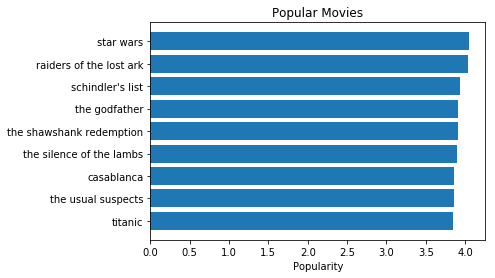

In [16]:
top_n = 10
plt.barh(df['title'].head(top_n), df['score'].head(top_n), align='center')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies");

From the plot above, we can see that the **Star Wars** will be on top of the **Trending Now!** list.

#### Trending Now! - Recommendation by Genre

Example for the genre = **animation**.

In [17]:
df_movies_1_animation = df[df.animation==1]

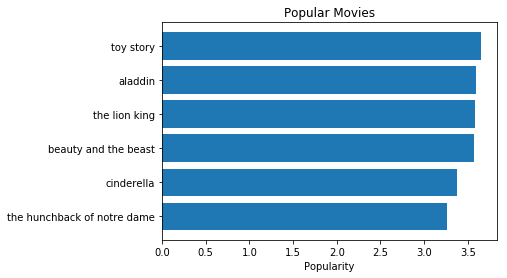

In [18]:
top_n = 10
plt.barh(df_movies_1_animation['title'].head(top_n), df_movies_1_animation['score'].head(top_n), align='center')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies");

The most popular animation movie is the **Toy Story**.

---

# Content Based Recommendation

Based on Cast, Genre, Keywords, Companies.

In [19]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
df_cbr = pd.DataFrame()

# handle cast
limit_cast_num = 10
df_cbr['cast'] = df['cast'].apply(lambda x: [''.join(i['cast_name'].split(",")[::-1]) for i in x] if isinstance(x, list) else [])
df_cbr['cast'] = df_cbr['cast'].apply(lambda x: x[:limit_cast_num] if len(x) >=limit_cast_num else x)
df_cbr['cast'] = df_cbr['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

# handle keyword
stemmer = SnowballStemmer('english')
df_cbr['keyword'] = df['keyword'].apply(lambda x: eval(x))
df_cbr['keyword'] = df_cbr['keyword'].apply(lambda x: [stemmer.stem(i) for i in x])
df_cbr['keyword'] = df_cbr['keyword'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
# handle genres
df_cbr['genre'] = df['genres']

# handle title
df_cbr['title'] = df['title']

# merge all
df_cbr['mixed'] = df_cbr['keyword'] + df_cbr['cast'] + df_cbr['genre']
df_cbr['mixed'] = df_cbr['mixed'].apply(lambda x: ' '.join(x))

df_cbr.head()

,cast,keyword,genre,title,mixed
0,"[davidankrum, grahamashley, markaustin, kennyb...","[monster, burnt-bodi, good-versus-evil, husban...","[action, adventure, romance, scifi, war]",star wars,monster burnt-bodi good-versus-evil husband-wi...
1,"[vicarmstrong, ishaqbux, sonnycaldinez, darinc...","[car-chas, slow-mot, good-versus-evil, gore, o...","[action, adventure]",raiders of the lost ark,car-chas slow-mot good-versus-evil gore openin...
2,[howardscottwarshaw],"[archeological-dig, nazi, world-war-two, gun, ...","[action, adventure]",raiders of the lost ark,archeological-dig nazi world-war-two gun pisto...
3,"[peterappiano, joachimpaulassbã¶ck, hans-jã¶rg...","[marriag, dark-hero, good-versus-evil, 1990s, ...","[drama, war]",schindler's list,marriag dark-hero good-versus-evil 1990s husba...
4,"[rudybond, marlonbrando, maxbrandt, richardbri...","[brother-brother-relationship, father-son-rela...","[action, crime, drama]",the godfather,brother-brother-relationship father-son-relati...


In [21]:
s = df_cbr.apply(lambda x: pd.Series(x['keyword']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'
s = s.value_counts()
s = s[s > 1]
s[:5]

cult-film                  82
blockbust                  75
murder                     60
title-spoken-by-charact    50
violenc                    46
Name: keyword, dtype: int64

In [22]:
count = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
count_matrix = count.fit_transform(df_cbr['mixed'])

In [30]:
count_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
indices = pd.Series(df_cbr.index, index=df_cbr['title'])
titles = df_cbr['title']

In [25]:
def get_recommendations(title):
    idx = indices[title]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:21]
    movie_indices = [i[0] for i in similarity_scores]
    return titles.iloc[movie_indices]

In [26]:
get_recommendations('star wars').head(10)

11       terminator 2: judgment day
36                   the terminator
1           raiders of the lost ark
38                           aliens
69     star trek: the wrath of khan
83         star trek: first contact
39            2001: a space odyssey
121               starship troopers
87                         face/off
113               the fifth element
Name: title, dtype: object

In [27]:
get_recommendations('the godfather').head(10)

25                 the godfather: part ii
55                             goodfellas
87                               face/off
8                      the usual suspects
90                                 ransom
126                       the devil's own
56     butch cassidy and the sundance kid
16                      l.a. confidential
36                         the terminator
99                                   heat
Name: title, dtype: object

---

# Siamese NN - Collaborative Metric Learning

References:  
[\[1\] Collaborative Metric Learning Recommendation
System: Application to Theatrical Movie Releases; Miguel	Campo,	JJ	Espinoza,	Julie	Rieger,	Abhinav	Taliyan](https://arxiv.org/pdf/1803.00202.pdf)

See notebook: recommendation with SiameseNN